# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>PCA BreastCancer</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# PCA (Principal Component Analysis)-BreastCancer

**PCA Uygulama Adımları**

1. **Veriyi scale edin:**
   - Özellikler farklı birim ve ölçeklerde olabilir (örneğin, sıcaklık "°C", rüzgar hızı "km/h").
   - **Standartlaştırma (Standardization)** işlemi, her bir özelliği sıfır ortalamalı ve birim standart sapmalı hale getirir.
   - PCA'nın, veriler arasındaki varyansı doğru analiz edebilmesi için bu adım gereklidir.

2. **Kovaryans matrisini hesaplayın (Compute the Covariance Matrix):**
   - Özellikler arasındaki ilişkinin gücünü ve yönünü belirlemek için kullanılır.
   - Kovaryans matrisindeki yüksek değerler, ilgili özellikler arasında güçlü bir ilişki olduğunu gösterir.

3. **Eigenvalues ve Eigenvectors hesaplayın (Compute Eigenvalues and Eigenvectors):**
   - Kovaryans matrisinden elde edilir.
   - **Özdeğerler (Eigenvalues):** Ana bileşenlerin veri varyansını açıklama gücünü temsil eder.
   - **Özvektörler (Eigenvectors):** Ana bileşenlerin yönünü belirler.

4. **Ana bileşenleri seçin:**
   - Özdeğerleri büyükten küçüğe sıralayın.
   - **Varyans Eşik Değeri (%80-90):** İlk birkaç ana bileşenin açıklayabildiği toplam varyansı kontrol edin.
   - Genellikle %80 veya %90'ın üzerinde varyans açıklanıyorsa yeterli sayıda bileşen seçilmiş demektir.

5. **Veriyi yeni bileşenlere dönüştürün:**
   - Orijinal veri, seçilen ana bileşenler üzerinden yeni bir veri kümesine dönüştürülür.
   - Bu adım, boyut azaltma ve bilgi yoğunlaştırma amacıyla gerçekleştirilir.

---

**PCA Kullanımı ile İlgili Önemli Notlar**

1. **Sonuçların Hedefe Uygunluğu:**
   - Eğer analiz sonucunda, müşteriye veya ilgili tarafa **tek tek her bir özelliğin etkisini açıklamanız gerekiyorsa** (örneğin, hangi özelliğin ne kadar katkı sağladığı), PCA **uygun bir yöntem değildir**.
   - Çünkü PCA, orijinal feature'ların etkilerini bileşenler üzerinden temsil eder ve doğrudan yorumlamayı zorlaştırır.

2. **Genel Değerlendirme Gereken Durumlar:**
   - Eğer sonuçta bireysel özelliklerden ziyade, **genel bir çıktı veya karar** önem arz ediyorsa PCA uygundur.
   - Örneğin, hava durumu tahmini sürecinde, sıcaklık, nem, rüzgar hızı ve basınç gibi özelliklerden elde edilen **nihai hava durumu tahmini** önemliyse PCA kullanılabilir.

3. **Örnek Senaryolar:**
   - **PCA Kullanımı Uygun Değil:** Müşteri segmentasyonu sonrası, her bir özellik (örneğin, gelir seviyesi, yaş, satın alma sıklığı) hakkında açıklama yapılması gerekiyorsa PCA uygun değildir.
   - **PCA Kullanımı Uygun:** Hava durumu tahmini yaparken, farklı meteorolojik verilerin (sıcaklık, nem, basınç) tek tek etkilerinden ziyade, bu verilerin birlikte oluşturduğu nihai tahmin önemliyse PCA uygundur.

---

PCA, boyut azaltma ve varyansı yoğunlaştırma için etkili bir araçtır. Ancak, nihai çıktının türüne göre karar verilmelidir:
- **Feature bazlı yorumlama gerekiyorsa:** PCA önerilmez.
- **Genel değerlendirme veya sonuç önemliyse:** PCA uygulanabilir.

## EDA

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import load_breast_cancer    # sklearn kütüphanesinden meme kanseri datasetini çağıralım
cancer = load_breast_cancer()
print(cancer.DESCR)   # 30 feature, 569 satır, tümörlerle alakalı feature lar var, 

# bir şahsın kanser olup olmadıgına dair bilgiler içeren bir dataseti

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [7]:
# import sklearn.datasets as datasets
# [x for x in dir(datasets) if x.startswith(('load_', 'fetch_'))]

# from sklearn.datasets import *
# dir(sklearn.datasets)

In [8]:
X=pd.DataFrame(cancer.data,columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X.shape   # 30 feature var

(569, 30)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
# target variable olarak iyi huylu-kötü huylu yani 0-1 sayılarını saydıralım

pd.DataFrame(cancer.target).value_counts()   

0
1    357
0    212
Name: count, dtype: int64

In [13]:
# 0-1 leri yer değiştirdik, çünkü kanserli olan data sınıfına odaklanıyoruz, 1 yapalım. 

y = pd.Series(cancer.target).map({0:1, 1:0})  
y.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [14]:
# hedef değişken olarak 1'i aldık, 212 kanser teşhisi var
y.value_counts()

0    357
1    212
Name: count, dtype: int64

In [15]:
a = pd.concat([X,y], axis=1)  # en sona y degerini ekledik
a

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,0
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [16]:
a.groupby(0).mean()  # 0 ve 1 olan kısımların groupby ile ortalamasını bakalım

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


## PCA with sklearn

## Scaling Data

**PCA'da Ölçeklendirme Neden Önemlidir?**

1. **PCA Varyansa Odaklanır:**  
   - PCA, verideki **varyansı yakalamayı** hedefler.  
   - Farklı ölçeklerdeki özellikler, büyük değerlere sahip olanların diğerlerini baskılamasına neden olabilir.  

2. **Standartlaştırma Tercih Edilmelidir:**  
   - Özelliklerin **ortalamasını sıfır** yapar ve **standart sapmaya böler**.  
   - PCA'nın varyansı doğru bir şekilde değerlendirmesini sağlar.  
   - Min-Max ölçeklendirme, varyansı korumadığı için önerilmez.  

3. **Ölçeklendirme Yapılmazsa:**  
   - Farklı ölçekler PCA'nın bileşenlerini çarpıtabilir, yanıltıcı sonuçlar doğurabilir.  

  
- PCA uygularken **StandardScaler** tercih edilmelidir. Bu, daha doğru ve dengeli sonuçlar elde edilmesini sağlar.

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
#scale işlemini yapalım

scaled_X = scaler.fit_transform(X)

<Axes: >

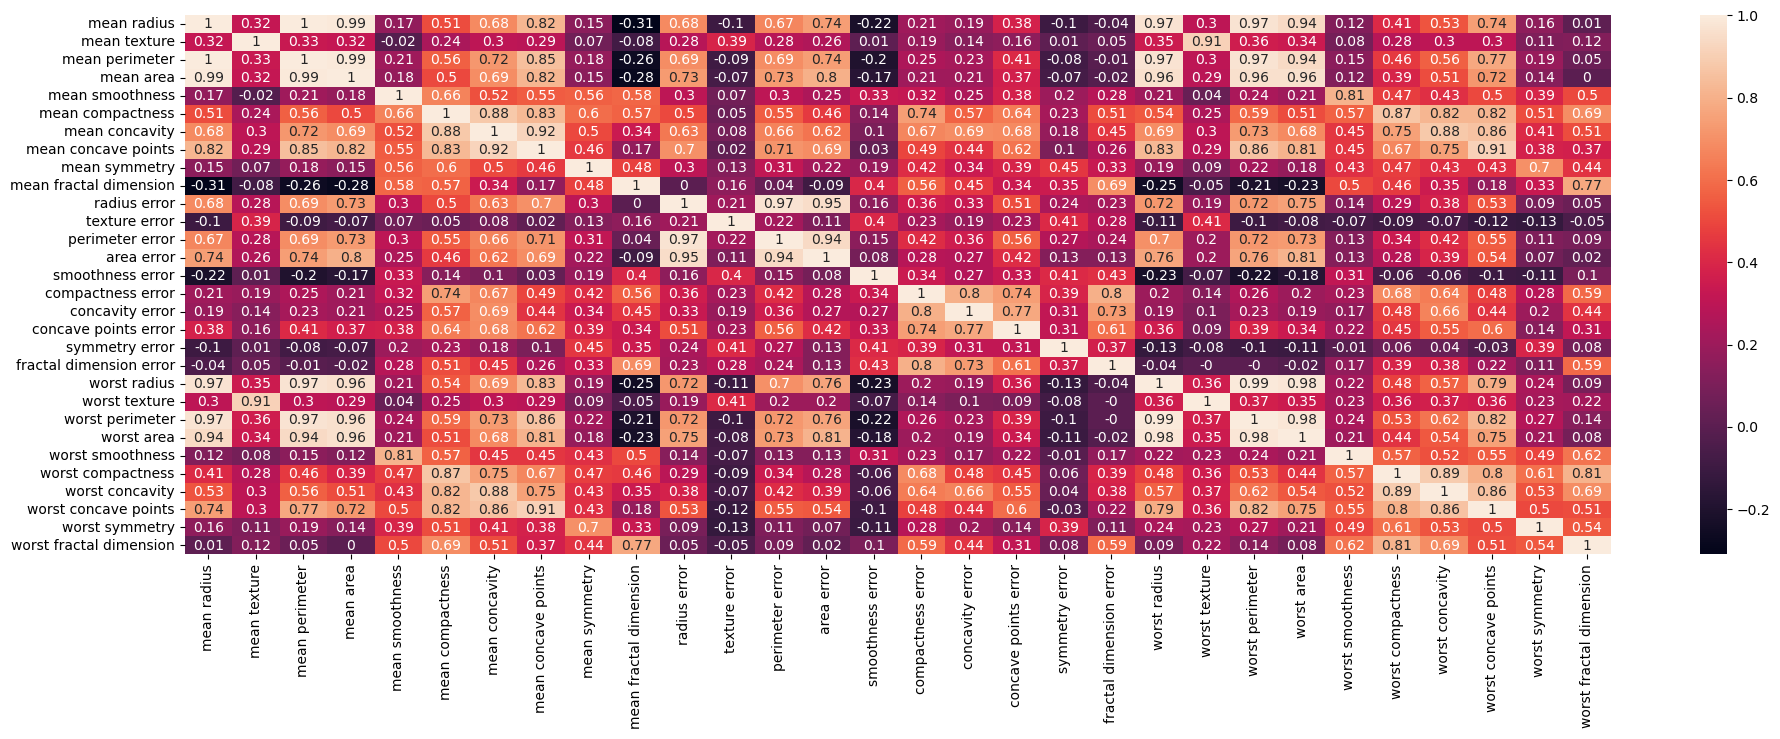

In [23]:
df_scaled_X = pd.DataFrame(scaled_X, columns = X.columns)

plt.figure(figsize = (23, 7))

sns.heatmap(df_scaled_X.corr().round(2), annot = True)

## PCA

**PCA'da *n_components* Seçimi**

**n_components** PCA ile kaç tane ana bileşen (principal component) oluşturulacağını belirler. Bu parametreyi seçerken dikkat edilmesi gerekenler:

---

**n_components İçin Geçerli Değerler:**
- **Feature ve Gözlem Sayısı:** **n_components**, veri setindeki **minimum değer (özellik sayısı veya gözlem sayısı)** kadar olabilir.  
  Örneğin:
  - 30 feature, 100 gözlem → En fazla **30** bileşen.
  - 100 feature, 30 gözlem → En fazla **30** bileşen.

---

**n_components Seçerken Dikkate Alınacak Faktörler:**

1. **Varyansı Açıklama Oranı:**
   - Her bileşen, veri setindeki toplam varyansın bir kısmını açıklar.
   - Genellikle %90-%95 gibi bir varyans açıklama oranını hedeflersiniz.  
     Örneğin, **n_components=10** ile toplam varyansın %95'i açıklanıyorsa bu kabul edilebilir.

2. **Model Performansı:**
   - PCA sonrası uygulanacak makine öğrenimi modelinin performansını optimize etmek için farklı **n_components** değerlerini deneyebilirsiniz.
   - Model doğruluğu veya başka metriklerle değerlendirme yapılabilir.

3. **Görselleştirme:**
   - Verilerinizi görselleştirmek istiyorsanız, **2 veya 3 bileşen** genellikle yeterlidir. Çünkü veriler bu şekilde iki veya üç boyutta kolayca gösterilebilir.

4. **Hesaplama Maliyeti:**
   - Daha az bileşen seçmek, işlem süresini ve kaynak kullanımını azaltır.
   - Büyük veri setleriyle çalışıyorsanız, hesaplama maliyetini düşürmek için düşük **n_components** değerlendirilebilir.

5. **Scree Plot Analizi:**
   - PCA bileşenlerinin varyans katkısını **scree plot** ile görselleştirebilirsiniz.
   - Grafikte **dirsek noktası** (elbow point) belirlenerek, faydanın azaldığı yerde bileşen sayısı seçilebilir.

6. **Alan Bilgisi (Domain Knowledge):**
   - Bazı durumlarda, alan bilginizle kaç bileşenin anlamlı olduğunu belirleyebilirsiniz.  
     Örneğin, pratik ya da teorik olarak belirli bir bileşen sayısı öne çıkabilir.

---

PCA'da **n_components**"PCA WorldHappiness 13.01.2025.ipynb" seçimi, hem varyansı yakalamak hem de veri işlemeyi kolaylaştırmak için kritik bir adımdır.  
- **Yüksek varyans hedefleniyorsa:** %90-95'i açıklayan bileşen sayısı.  
- **Görselleştirme amaçlıysa:** 2 veya 3 bileşen yeterli.  
- **Scree Plot Analizi ile:** Dirsek noktasına bakılarak seçim yapılabilir.

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)   # 2 bileşen seçildi

In [28]:
principal_components = pca.fit_transform(scaled_X)   # 30 feature'ı 2 bileşene dönüştürdü

In [29]:
principal_components

# 2 sütun halinde 2 bileşene idirdik 30 feature ı

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [30]:
component_df = pd.DataFrame(data = principal_components, columns = ["first_component", 
                                                                    "second_component"])
component_df

# component lerin etkisini gorelim. yukardakileri DF e dönüştürdük
# ilk componentte yüksek olan deger 2. de düşük veya tersi gecerli

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


## Eigenvalues & Eigenvectors

In [32]:
# PCA nın arkasında çalışan iki husus var: EV ve EVec

#Eigenvectors. (her 2 bileşen için özdeğer vektorleri)

pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [33]:
eigenvectors_first_component = pca.components_[0]  # ilk companent'de tüm featurelardaki maksimum variance'ın yönünü temsil ederler.
eigenvectors_first_component

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

In [34]:
#her feature ın first component'teki kakısını gorelim

first_eigenvectors = pd.DataFrame(eigenvectors_first_component, index=X.columns, 
                                  columns=["first_eigenvectors"]).sort_values("first_eigenvectors", ascending=False)

first_eigenvectors

,first_eigenvectors
mean concave points,0.260854
mean concavity,0.258400
worst concave points,0.250886
mean compactness,0.239285
worst perimeter,0.236640
worst concavity,0.228768
worst radius,0.227997
mean perimeter,0.227537
worst area,0.224871
mean area,0.220995


In [35]:
# 2.bileşen içn aynı işlemler

eigenvectors_second_component = pca.components_[1]
eigenvectors_second_component

array([-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
        0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
       -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
        0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
       -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
        0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947])

In [36]:
# her feature ın second component'teki kakısını gorelim

second_eigenvectors = pd.DataFrame(eigenvectors_second_component, index=X.columns, 
                                   columns=["second_eigenvectors"]).sort_values("second_eigenvectors", ascending=False)

second_eigenvectors

,second_eigenvectors
mean fractal dimension,0.366575
fractal dimension error,0.280092
worst fractal dimension,0.275339
compactness error,0.232716
smoothness error,0.204430
concavity error,0.197207
mean symmetry,0.190349
mean smoothness,0.186113
symmetry error,0.183848
worst smoothness,0.172304


In [37]:
# katkıları tek tabloda birleştirelim

pd.concat([first_eigenvectors, second_eigenvectors], axis=1)

,first_eigenvectors,second_eigenvectors
mean concave points,0.260854,-0.034768
mean concavity,0.258400,0.060165
worst concave points,0.250886,-0.008257
mean compactness,0.239285,0.151892
worst perimeter,0.236640,-0.199878
worst concavity,0.228768,0.097964
worst radius,0.227997,-0.219866
mean perimeter,0.227537,-0.215181
worst area,0.224871,-0.219352
mean area,0.220995,-0.231077


In [38]:
df_scaled_X.loc[0]

mean radius                1.097064
mean texture              -2.073335
mean perimeter             1.269934
mean area                  0.984375
mean smoothness            1.568466
mean compactness           3.283515
mean concavity             2.652874
mean concave points        2.532475
mean symmetry              2.217515
mean fractal dimension     2.255747
radius error               2.489734
texture error             -0.565265
perimeter error            2.833031
area error                 2.487578
smoothness error          -0.214002
compactness error          1.316862
concavity error            0.724026
concave points error       0.660820
symmetry error             1.148757
fractal dimension error    0.907083
worst radius               1.886690
worst texture             -1.359293
worst perimeter            2.303601
worst area                 2.001237
worst smoothness           1.307686
worst compactness          2.616665
worst concavity            2.109526
worst concave points       2

In [39]:
# ustteki degerleri vektör ile çarpıp toplamını aldık

(df_scaled_X.loc[0] * eigenvectors_first_component).sum()

9.192836826213236

In [40]:
#ustteki degerin aynı satırındaki 2.bileşenin sağlaması
(df_scaled_X.loc[0] * eigenvectors_second_component).sum()

1.9485830707786183

In [41]:
# ustteki degerlerin oldugu ilk tablo

component_df.head()

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [42]:
# açıklanan varyansa bakalım, 1. ve 2.bileşene  katkıları.
pca.explained_variance_ #Eigenvalues

array([13.30499079,  5.7013746 ])

## Corr between components

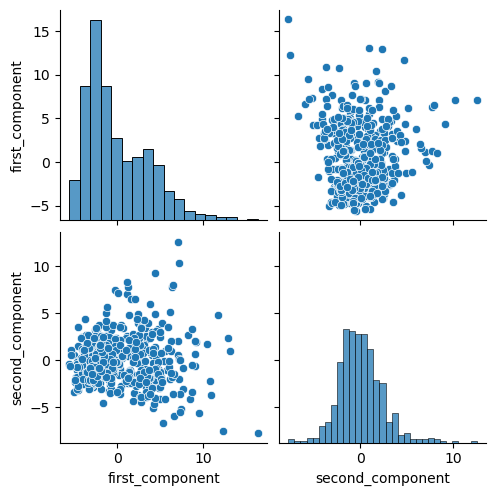

In [44]:
sns.pairplot(component_df)

In [45]:
component_df.corr().round()

# PCA in yapısı geregi bu 2 bileşen birbirine dik oldugundan correlasyon 0 olur

,first_component,second_component
first_component,1.0,0.0
second_component,0.0,1.0


## Finding optimal number of components

In [47]:
pca.explained_variance_ratio_    

array([0.44272026, 0.18971182])

In [48]:
pca.explained_variance_ratio_.cumsum()   # kumulatıf oranı. 2.değer iksinin toplamı

array([0.44272026, 0.63243208])

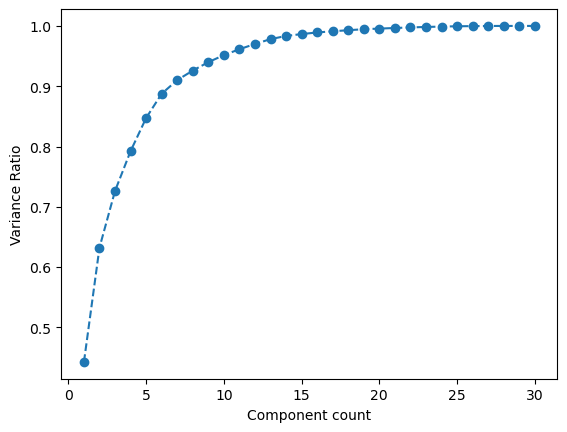

In [49]:
# her bileşen eklendikçe varyans oranının nasıl değiştiğini kumulatif görelim

pca = PCA().fit(scaled_X)
x = range(1 , 31)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_),"--o")
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [50]:
pca = PCA(n_components=30).fit(scaled_X)   # 30 bileşen oluşturduk

In [51]:
my_dict = {"explained_variance":pca.explained_variance_, 
        "explained_variance_ratio":pca.explained_variance_ratio_,
        "cumsum_explained_variance_ratio":pca.explained_variance_ratio_.cumsum()}

# degerleri tabloda gormek içn dict oluşturduk

In [52]:
df_ev = pd.DataFrame(my_dict, index = range(1,31))
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,13.304991,0.442720,0.442720
2,5.701375,0.189712,0.632432
3,2.822910,0.093932,0.726364
4,1.984128,0.066021,0.792385
5,1.651633,0.054958,0.847343
6,1.209482,0.040245,0.887588
7,0.676409,0.022507,0.910095
8,0.477456,0.015887,0.925983
9,0.417629,0.013896,0.939879
10,0.351311,0.011690,0.951569


<Axes: xlabel='None', ylabel='explained_variance_ratio'>

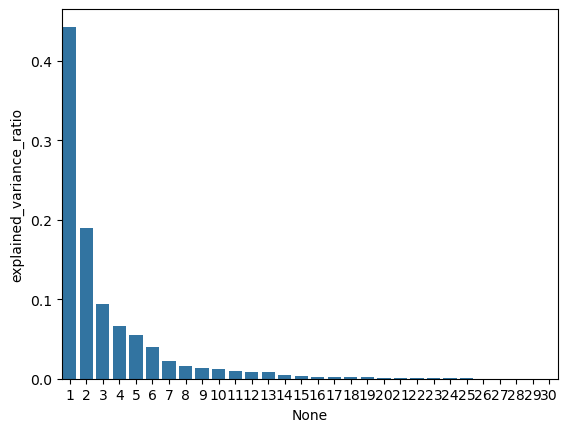

In [53]:
# yukardaki değerleri grafikte görelim
sns.barplot(x = df_ev.index, y= df_ev.explained_variance_ratio)

In [54]:
# daha konsantre bilgi elde etmek amacıyla burada 2 bileşenle devam edilmiştir. 
pca = PCA(n_components=2)

In [55]:
# en ustte yaptıgımız işlemlerin tekrarı 

principal_components = pca.fit_transform(scaled_X)
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [56]:
# aynı tabloda yan yana gorelim
component_df = pd.DataFrame(data = principal_components, columns = ["first_component", 
                                                                    "second_component"])
component_df

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


## Interpreting PCA results

In [58]:
scaled_df = pd.DataFrame(scaled_X, columns=X.columns)
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [59]:
# ilgili dataları alalım

combined_df = pd.concat([component_df, scaled_df], axis =1)
correlation = combined_df.corr()
correlation.head()

,first_component,second_component,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
first_component,1.000000e+00,2.198435e-16,0.797767,0.378013,0.829236,0.805393,0.519653,0.872050,0.941713,0.950654,...,0.830910,0.380727,0.862408,0.819517,0.466310,0.765672,0.833719,0.914327,0.447913,0.480273
second_component,2.198435e-16,1.000000e+00,-0.557903,-0.142438,-0.513349,-0.551270,0.444002,0.362361,0.143534,-0.082943,...,-0.524526,-0.108469,-0.476841,-0.523298,0.411059,0.342564,0.233709,-0.019699,0.338485,0.656865
mean radius,7.977668e-01,-5.579027e-01,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,3.780132e-01,-1.424382e-01,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,8.292355e-01,-5.133487e-01,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019


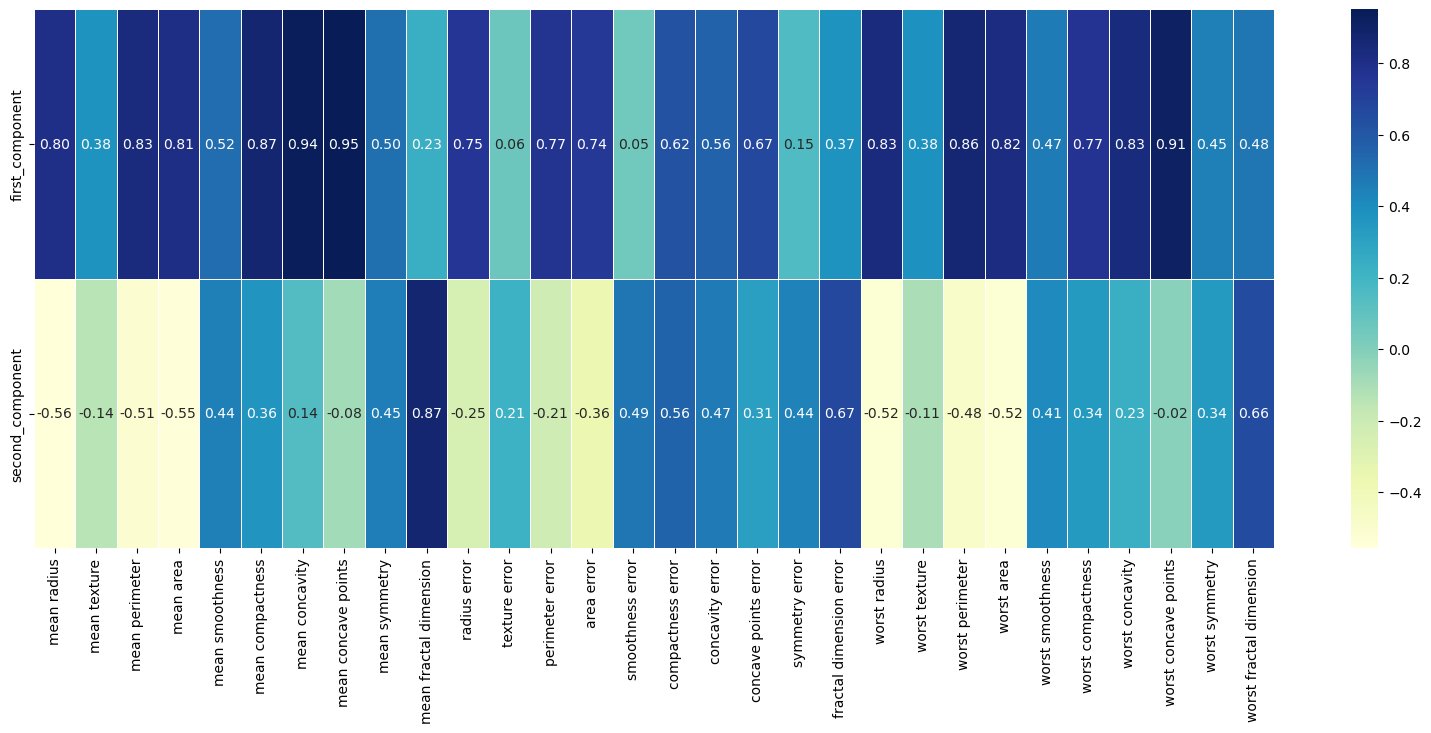

In [60]:
# birbirleriyle korelasyonuna bakalım
# alttaki kodda heatmap için sadece firs_component ve second_component ile sağ tarafta da mean_radius ile başlayan sütundan itibaren almayı sağlıyoruz. 

fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation.iloc[:2,2:], cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

<Axes: xlabel='first_component', ylabel='second_component'>

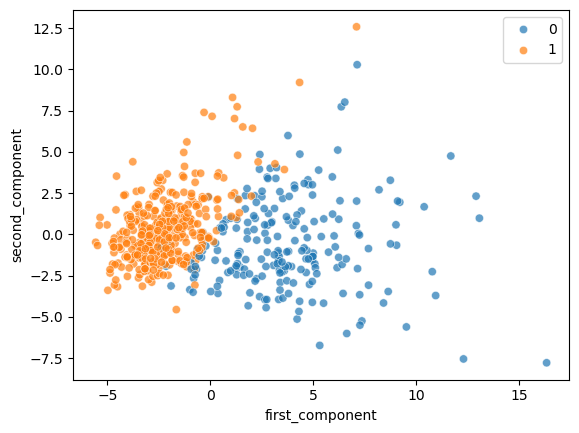

In [61]:
sns.scatterplot(x = component_df.first_component, y= component_df.second_component, hue=cancer.target, alpha=0.7)

## K-Means Algorithm Application

In [63]:
# inertia hesabı

from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(component_df)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

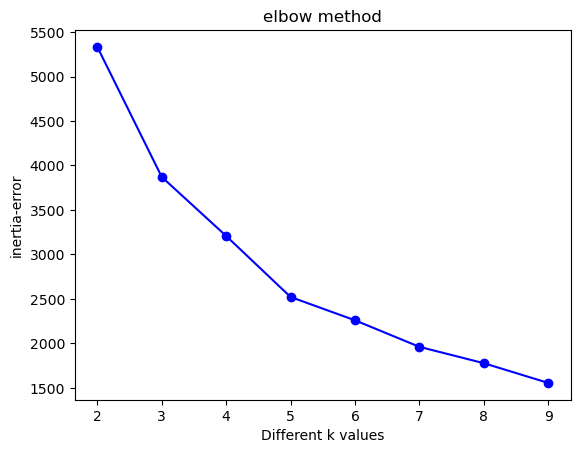

In [64]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

# alttaki, grafikte sert düşüşü arıyoruz
# daha önce yaptıgımız ara işlemleri altta yapacagız tekrar

In [65]:
ssd

[5332.555574203132,
 3871.148055938512,
 3207.643163382355,
 2521.908959686801,
 2259.714909282641,
 1961.4447228647787,
 1777.4690499930489,
 1555.832925802105]

In [66]:
pd.Series(ssd).diff()

0            NaN
1   -1461.407518
2    -663.504893
3    -685.734204
4    -262.194050
5    -298.270186
6    -183.975673
7    -221.636124
dtype: float64

In [67]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,1461.407518
3,663.504893
4,685.734204
5,262.194050
6,298.270186
7,183.975673
8,221.636124


<Axes: >

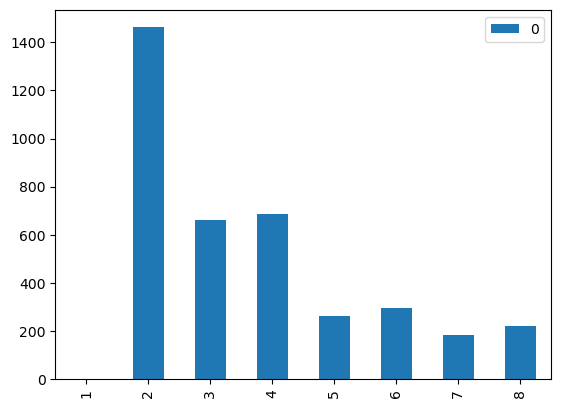

In [68]:
df_diff.plot(kind='bar')  
# nispeten 3 e daha sert düüş var, 3 olarak söyleyebilirim

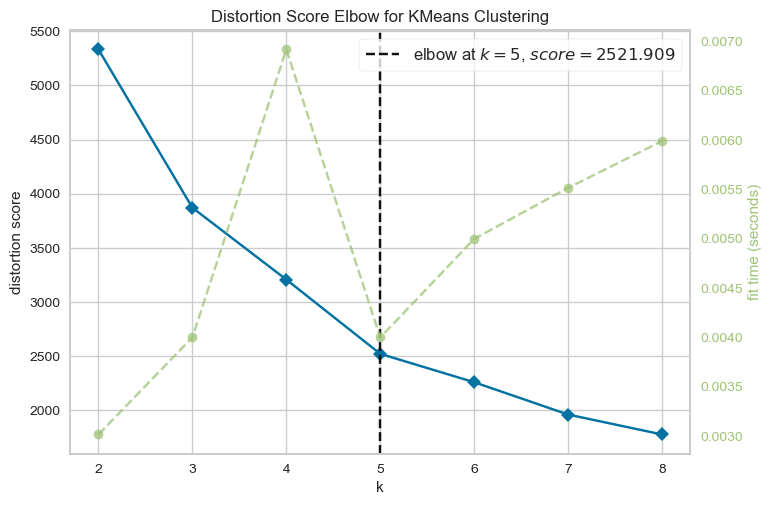

In [69]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(component_df)        # Fit the data to the visualizer
visualizer.show();

In [70]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(component_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(component_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5084690190672023
For n_clusters=3, the silhouette score is 0.4910071765416258
For n_clusters=4, the silhouette score is 0.3482626892985705
For n_clusters=5, the silhouette score is 0.3584513628253008
For n_clusters=6, the silhouette score is 0.3143718464464615
For n_clusters=7, the silhouette score is 0.3187121063364377
For n_clusters=8, the silhouette score is 0.33817673617746175


<Axes: xlabel='first_component', ylabel='second_component'>

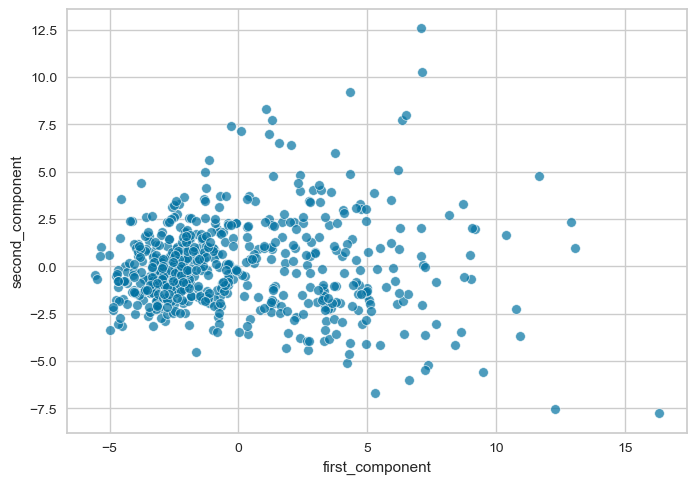

In [71]:
sns.scatterplot(x = component_df.first_component, y= component_df.second_component, alpha=0.7)

In [72]:
model = KMeans(n_clusters =2, random_state=42)
clusters = model.fit_predict(component_df)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [73]:
ct = pd.crosstab(y, clusters)
ct

# toplamda 53 hata goruluyor

col_0,0,1
row_0,,
0,16,341
1,175,37


Text(0.5, 1.0, 'K_means')

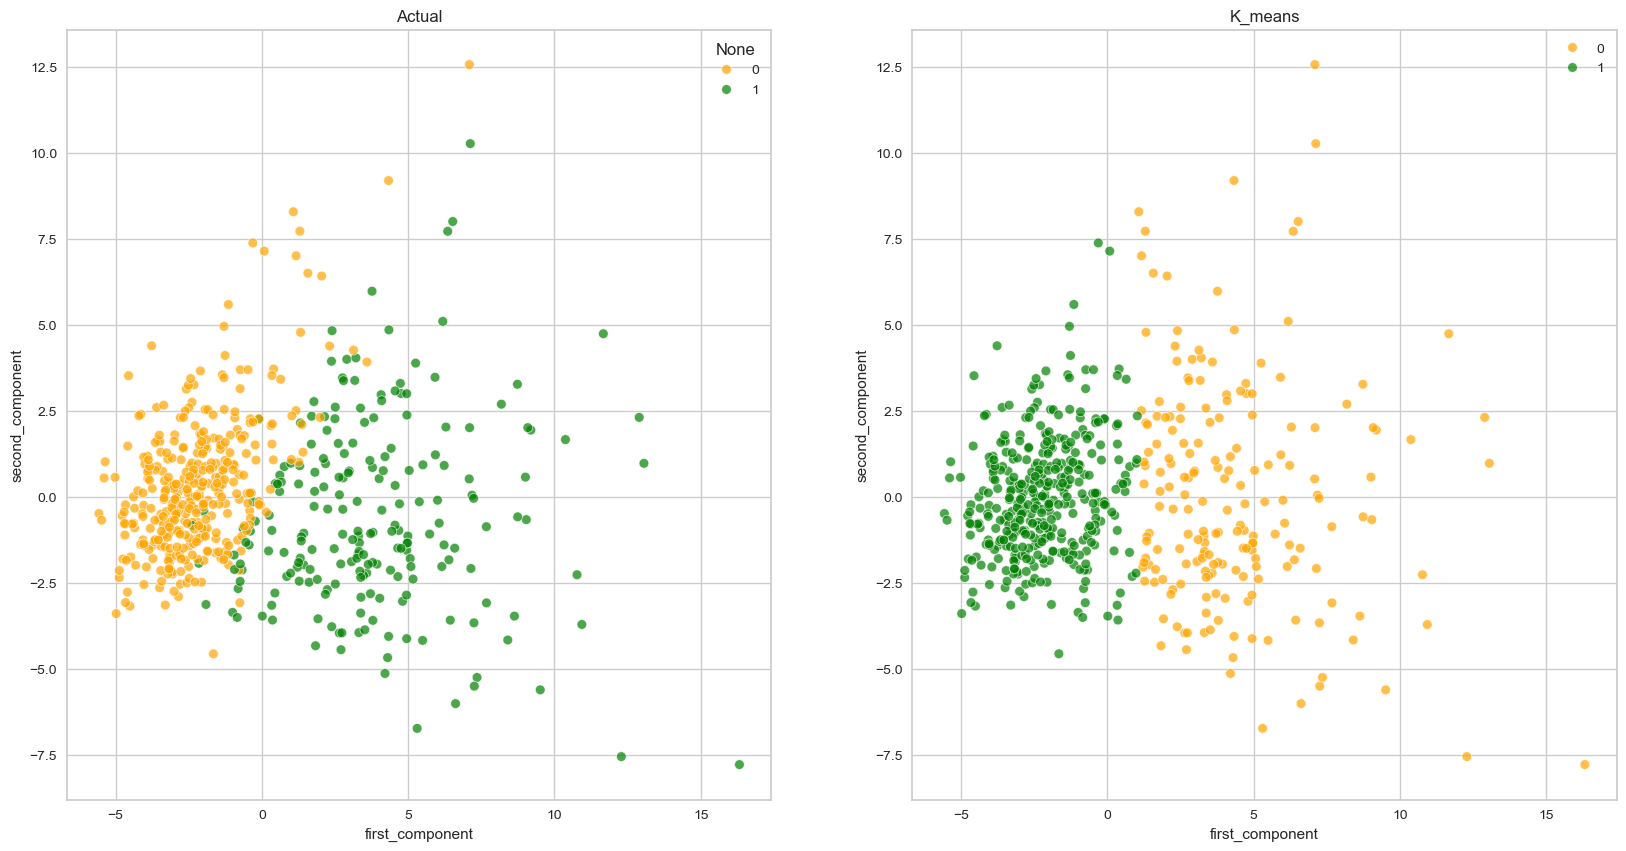

In [74]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x = component_df.first_component, y= component_df.second_component, hue=y, alpha=0.7,
                palette=['orange','green'])
plt.title("Actual")

plt.subplot(122)
sns.scatterplot(x = component_df.first_component, y= component_df.second_component, hue=clusters, alpha=0.7,
               palette=['orange','green'])
plt.title("K_means")

# <p style="background-color:green;font-family:newtimeroman;font-size:125%;color:white;text-align:center;border-radius:20px 20px;"><b>Faydalı Olması Temennisiyle Teşekkürler</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |